https://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html

One-Class SVM (OSVM), also known as One-Class Support Vector Machine, is a specialized version of the SVM algorithm used for novelty detection. This technique is particularly useful in identifying anomalies or outliers in datasets where the majority of the data represents 'normal' behavior, and the anomalies are few and not well represented.

### Application of One-Class SVM:

One-Class SVM has been effectively applied in various domains. For instance, a practical application can be found in the field of network security, where it is used to detect anomalies in network traffic. An example of this is a Python implementation of One-Class SVM for detecting network anomalies. The algorithm learns from a dataset representing 'normal' traffic and is then able to identify traffic patterns that deviate from this norm as potential threats or anomalies.

### How One-Class SVM Works:

One-Class SVM (Support Vector Machine) is a method used for novelty detection, which is a form of anomaly or outlier detection. Unlike traditional SVMs that separate two classes, One-Class SVM focuses on only one class and aims to detect outliers that do not belong to this class. Here's how it works:

1. **Learning from Only One Class**: In One-Class SVM, the algorithm is trained only on data that is considered 'normal'. There are no examples of 'outlier' data during the training phase. The idea is to learn the properties of normal cases.

2. **Creating a Decision Function**: The algorithm tries to find the best boundary that encompasses all the normal data points. This boundary is shaped in such a way that it maximizes the distance from the origin in a high-dimensional space (created by a kernel trick, often an RBF kernel) to the closest data point. The region inside this boundary is considered a "normal" region.

3. **Identifying Outliers**: Once the model is trained and the decision boundary is established, any new data point that falls inside this boundary is classified as 'normal', and any point that falls outside this boundary is classified as an 'outlier' or 'anomaly'. 

4. **Nu and Gamma Parameters**: The `nu` parameter specifies an upper bound on the fraction of training errors and a lower bound of the fraction of support vectors. The `gamma` parameter (in case of an RBF kernel) defines how far the influence of a single training example reaches.

5. **High-Dimensional Space**: One-Class SVM uses a kernel trick to map the input space into a higher-dimensional space where the separation is performed. This mapping allows the algorithm to create non-linear boundaries in the original input space.

6. **Sensitivity to Outliers**: The One-Class SVM is known to be sensitive to outliers, which means it's crucial to set the hyperparameters (`nu` and `gamma`) correctly to balance the sensitivity and specificity of the model.


In [3]:
import numpy as np
from sklearn import svm

# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

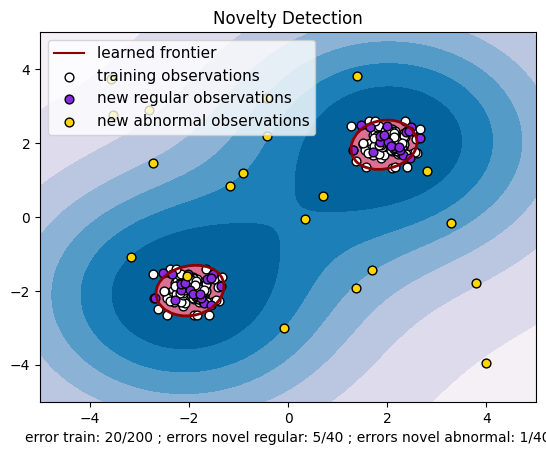

In [4]:
import matplotlib.font_manager
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, ax = plt.subplots()

xx, yy = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5, 10))
X = np.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis=1)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,
    cmap="PuBu",
)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,
    levels=[0, 10000],
    colors="palevioletred",
)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    plot_method="contour",
    ax=ax,
    levels=[0],
    colors="darkred",
    linewidths=2,
)

s = 40
b1 = ax.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = ax.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = ax.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.legend(
    [mlines.Line2D([], [], color="darkred"), b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
ax.set(
    xlabel=(
        f"error train: {n_error_train}/200 ; errors novel regular: {n_error_test}/40 ;"
        f" errors novel abnormal: {n_error_outliers}/40"
    ),
    title="Novelty Detection",
    xlim=(-5, 5),
    ylim=(-5, 5),
)
plt.show()